<center>
<h2>Capstone Project</h2>

# <span style='color: #81A5FF; '> ❔ Preparing Questionnaire Data for Predictive Model </span>

<h3> Group 4 </h3>

<span style='color: #081F4F; font-size: 18px;'>2023/2024</span>
</center>


---------

#### INDICE E DESCRIÇÃO

1. Importing Libraries and Data
2. Summary Statistics
3. Visualization
4. Build the Predictive Model

---------

### 1. Importing Libraries and Data

In [3]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

#Predictive model
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

#ignore warnings
import warnings
warnings.filterwarnings("ignore")

%load_ext autoreload
%autoreload 2

In [4]:
#Extracting the AI generated answers
answers = pd.DataFrame()
for personality in os.listdir('data/training_answers/original/'):
    personality_answer = pd.read_csv('data/training_answers/original/' + personality)
    personality_answer['personality'] = personality
    answers = pd.concat([answers,personality_answer])

In [5]:
answers

,Willingness to Try Exotic Foods,Importance of Food Presentation,Value for Money in Meals,Preference for Gourmet Restaurants,Interest in Nutritional Content,Frequency of Eating Home-Cooked Meals,Desire for New Culinary Experiences,Preference for Organic or Diet-Specific Foods,Enjoyment of Traditional or Familiar Foods,Willingness to Spend on High-Quality Ingredients,personality
0,2,3,4,2,3,5,2,3,5,3,comfort_food_lover_responses.csv
1,1,2,3,1,2,4,1,2,4,2,comfort_food_lover_responses.csv
2,2,3,4,2,3,5,2,3,5,3,comfort_food_lover_responses.csv
3,3,2,3,3,2,4,1,4,4,2,comfort_food_lover_responses.csv
4,1,3,4,1,3,5,2,2,5,3,comfort_food_lover_responses.csv
...,...,...,...,...,...,...,...,...,...,...,...
16,5,3,4,4,3,4,5,3,3,3,the_adventurer_responses.csv
17,5,3,3,2,4,3,5,2,3,5,the_adventurer_responses.csv
18,5,4,3,3,3,3,5,3,4,4,the_adventurer_responses.csv
19,4,3,2,4,3,4,5,3,3,2,the_adventurer_responses.csv


In [6]:
personality_mapping_names = {}
for personality in list(answers['personality'].unique()):
    name = personality.split('_')
    name_clean = []
    for section in name:
        section = section.capitalize()
        name_clean.append(section)
    name_clean = ' '.join(name_clean)
    name_clean = name_clean[:-4]
    personality_mapping_names[personality] = name_clean

In [7]:
answers['personality'] = answers['personality'].map(personality_mapping_names)

In [8]:
#Extracting the AI augmented answers
answers_aug = pd.DataFrame()
for personality in os.listdir('data/training_answers/aug/'):
    personality_answer = pd.read_csv('data/training_answers/aug/' + personality)
    personality_answer['personality'] = personality
    answers_aug = pd.concat([answers_aug,personality_answer])

In [9]:
answers_aug

,Willingness to Try Exotic Foods,Importance of Food Presentation,Value for Money in Meals,Preference for Gourmet Restaurants,Interest in Nutritional Content,Frequency of Eating Home-Cooked Meals,Desire for New Culinary Experiences,Preference for Organic or Diet-Specific Foods,Enjoyment of Traditional or Familiar Foods,Willingness to Spend on High-Quality Ingredients,personality
0,3,2,4,1,2,4,1,4,4,3,comfort_food_lover_responses_aug.csv
1,1,2,3,1,2,4,1,2,4,2,comfort_food_lover_responses_aug.csv
2,3,2,3,3,2,4,1,4,4,2,comfort_food_lover_responses_aug.csv
3,1,2,3,1,2,4,1,2,4,2,comfort_food_lover_responses_aug.csv
4,2,3,4,2,3,5,2,3,5,3,comfort_food_lover_responses_aug.csv
...,...,...,...,...,...,...,...,...,...,...,...
4995,5,4,3,3,3,3,5,4,4,4,the_adventurer_responses_aug.csv
4996,5,3,3,2,3,2,5,3,3,2,the_adventurer_responses_aug.csv
4997,4,3,3,4,3,4,5,3,3,4,the_adventurer_responses_aug.csv
4998,5,3,3,5,3,3,5,3,2,3,the_adventurer_responses_aug.csv


In [10]:
personality_mapping_names = {}
for personality in list(answers_aug['personality'].unique()):
    name = personality.split('_')
    name_clean = []
    for section in name:
        section = section.capitalize()
        name_clean.append(section)
    name_clean = ' '.join(name_clean)
    name_clean = name_clean[:-8]
    personality_mapping_names[personality] = name_clean

In [11]:
answers_aug['personality'] = answers_aug['personality'].map(personality_mapping_names)

In [12]:
total_answers = pd.concat([answers,answers_aug])

In [13]:
# Export the total_answers to a CSV file
total_answers.to_csv('data/training_answers/total_answers', index=False)

In [14]:
# Import the data with noise
perturbed_total_answers = pd.read_csv('data/training_answers/perturbed_total_answers.csv')

### 2. Summary Statistics

In [15]:
perturbed_total_answers['personality'].value_counts()

personality
Comfort Food Lover Responses         5021
Conscious Eater Responses            5021
Fine Dining Connoisseur Responses    5021
Low Cost Foodie Responses            5021
The Adventurer Responses             5021
Name: count, dtype: int64

In [16]:
total_answers.describe()


,Willingness to Try Exotic Foods,Importance of Food Presentation,Value for Money in Meals,Preference for Gourmet Restaurants,Interest in Nutritional Content,Frequency of Eating Home-Cooked Meals,Desire for New Culinary Experiences,Preference for Organic or Diet-Specific Foods,Enjoyment of Traditional or Familiar Foods,Willingness to Spend on High-Quality Ingredients
count,25105.000000,25105.000000,25105.000000,25105.000000,25105.000000,25105.00000,25105.000000,25105.000000,25105.000000,25105.000000
mean,2.935830,3.150010,3.172237,2.801952,3.459032,3.37861,3.108504,3.723601,3.057638,3.324278
std,1.074237,1.100999,1.114380,1.406351,1.010148,1.16275,1.200177,0.980552,1.098256,1.185628
min,1.000000,1.000000,1.000000,1.000000,2.000000,1.00000,1.000000,2.000000,1.000000,1.000000
25%,2.000000,2.000000,2.000000,1.000000,3.000000,3.00000,2.000000,3.000000,2.000000,3.000000
50%,3.000000,3.000000,3.000000,3.000000,3.000000,4.00000,3.000000,4.000000,3.000000,3.000000
75%,3.000000,4.000000,4.000000,4.000000,4.000000,4.00000,4.000000,5.000000,4.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000


In [17]:
perturbed_total_answers.describe()

,Willingness to Try Exotic Foods,Importance of Food Presentation,Value for Money in Meals,Preference for Gourmet Restaurants,Interest in Nutritional Content,Frequency of Eating Home-Cooked Meals,Desire for New Culinary Experiences,Preference for Organic or Diet-Specific Foods,Enjoyment of Traditional or Familiar Foods,Willingness to Spend on High-Quality Ingredients
count,25105.000000,25105.000000,25105.000000,25105.000000,25105.00000,25105.000000,25105.000000,25105.000000,25105.000000,25105.000000
mean,2.945389,3.098865,3.126987,2.871938,3.29038,3.255885,3.051504,3.477514,3.040829,3.202828
std,1.537145,1.529670,1.529912,1.515972,1.48799,1.501356,1.534529,1.455270,1.524355,1.511972
min,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,2.000000,2.000000,1.000000,2.00000,2.000000,1.000000,2.000000,2.000000,2.000000
50%,3.000000,3.000000,3.000000,3.000000,3.00000,3.000000,3.000000,4.000000,3.000000,3.000000
75%,4.000000,5.000000,5.000000,4.000000,5.00000,5.000000,4.000000,5.000000,5.000000,5.000000
max,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000


In [18]:
perturbed_total_answers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25105 entries, 0 to 25104
Data columns (total 11 columns):
 #   Column                                            Non-Null Count  Dtype 
---  ------                                            --------------  ----- 
 0   Willingness to Try Exotic Foods                   25105 non-null  int64 
 1   Importance of Food Presentation                   25105 non-null  int64 
 2   Value for Money in Meals                          25105 non-null  int64 
 3   Preference for Gourmet Restaurants                25105 non-null  int64 
 4   Interest in Nutritional Content                   25105 non-null  int64 
 5   Frequency of Eating Home-Cooked Meals             25105 non-null  int64 
 6   Desire for New Culinary Experiences               25105 non-null  int64 
 7   Preference for Organic or Diet-Specific Foods     25105 non-null  int64 
 8   Enjoyment of Traditional or Familiar Foods        25105 non-null  int64 
 9   Willingness to Spend on High

### 3. Visualization

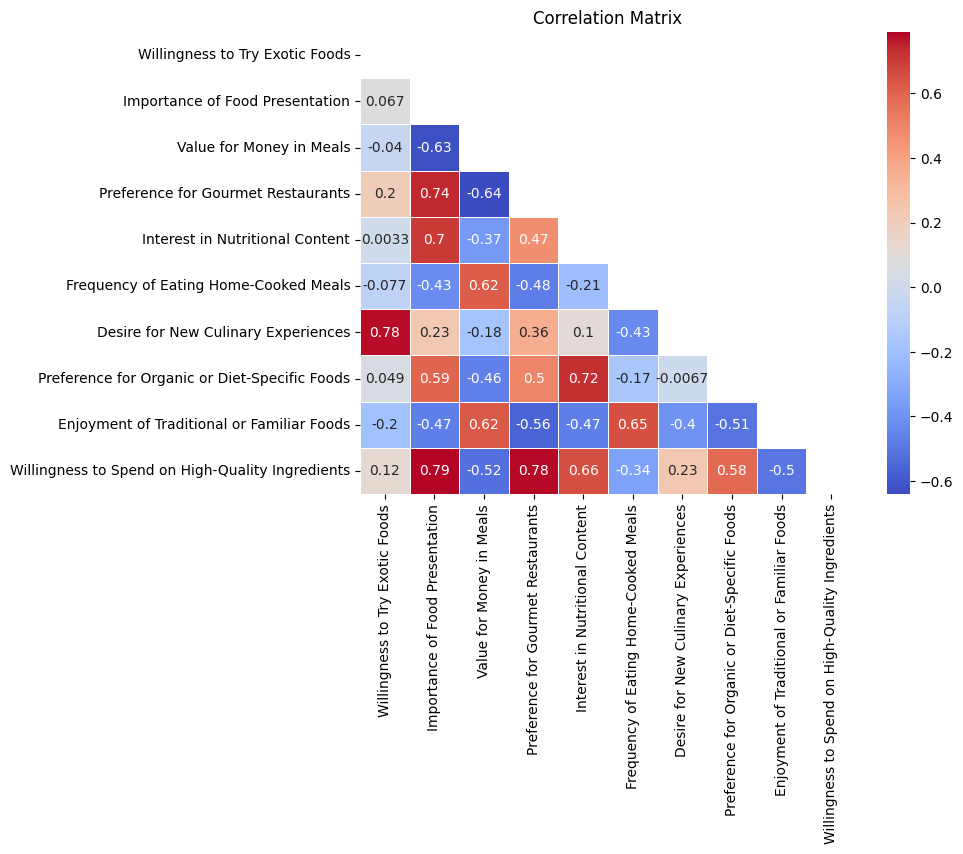

In [19]:
# Compute the correlation matrix for the original dataset

# Select only numeric features
numeric_total_answers = total_answers.select_dtypes(include=[np.number])

correlation_matrix = numeric_total_answers.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))


# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, mask=mask,annot=True, cmap='coolwarm', linewidths=.5)
plt.title("Correlation Matrix")
plt.show()

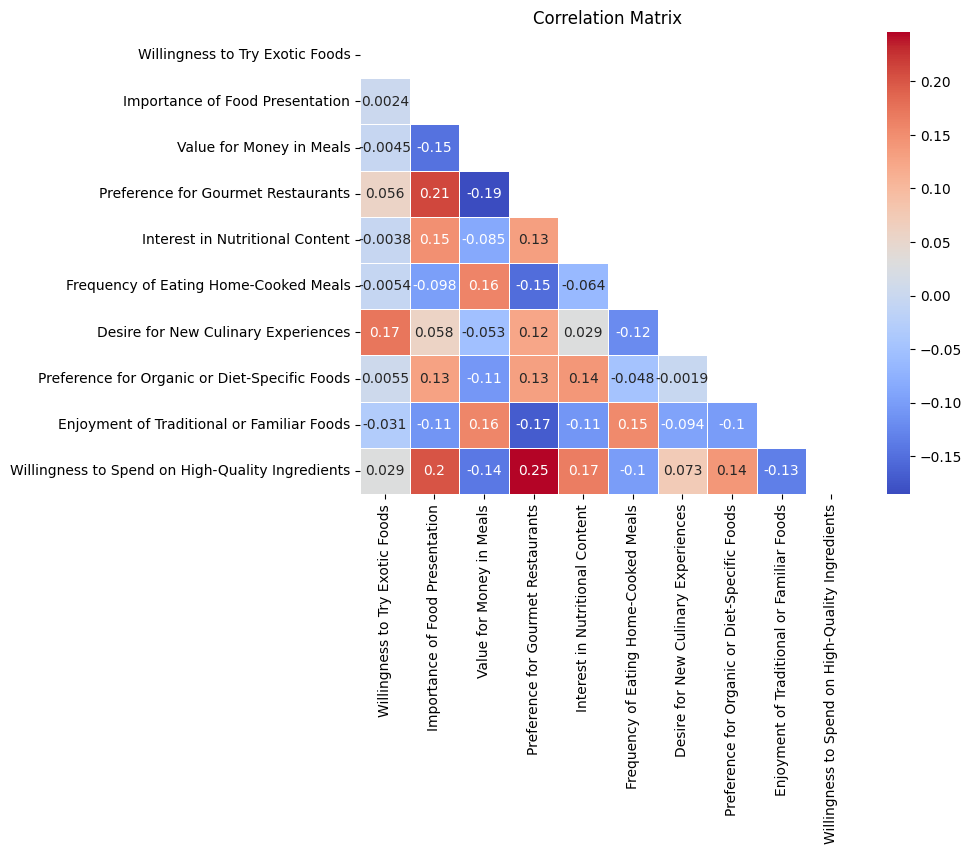

In [20]:
# Compute the correlation matrix for the original dataset

# Select only numeric features
numeric_perturbed_total_answers = perturbed_total_answers.select_dtypes(include=[np.number])

correlation_matrix = numeric_perturbed_total_answers.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, mask=mask,annot=True, cmap='coolwarm', linewidths=.5)
plt.title("Correlation Matrix")
plt.show()

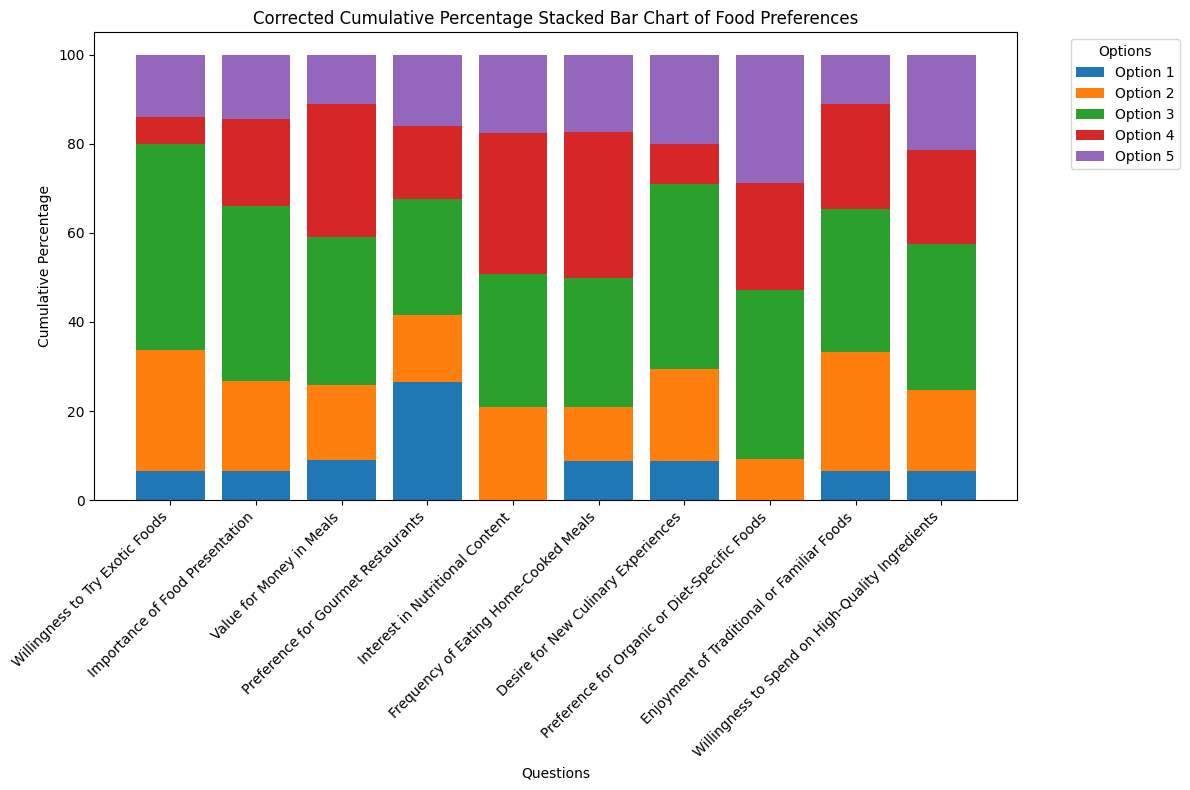

In [40]:

# Calculating the feature percentages for each rating of each feature

# Count frequencies of each rating for each feature
rating_counts = numeric_total_answers.apply(pd.Series.value_counts)

# Calculate the total responses for each feature
total_responses = numeric_total_answers.count()

# Calculate percentages: (frequency of rating / total responses) * 100
feature_percentages = (rating_counts / total_responses) * 100

# Transpose the DataFrame for better readability
feature_percentages_transposed = feature_percentages.T

# Fill NaN
feature_percentages_transposed = feature_percentages_transposed.fillna(0)


# Plotting the corrected percentage stacked bar chart
plt.figure(figsize=(12, 8))

# Bottom tracker for each bar
bottoms_corrected = pd.Series([0]*len(feature_percentages_transposed), index=feature_percentages_transposed.index)

# Plot each feature
for column in feature_percentages_transposed.columns:
    plt.bar(feature_percentages_transposed.index, feature_percentages_transposed[column], 
            bottom=bottoms_corrected, label=f'Option {column}')
    bottoms_corrected += feature_percentages_transposed[column]

plt.title('Corrected Cumulative Percentage Stacked Bar Chart of Food Preferences')
plt.xlabel('Questions')
plt.ylabel('Cumulative Percentage')
plt.xticks(rotation=45, ha="right")
plt.legend(title='Options', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()

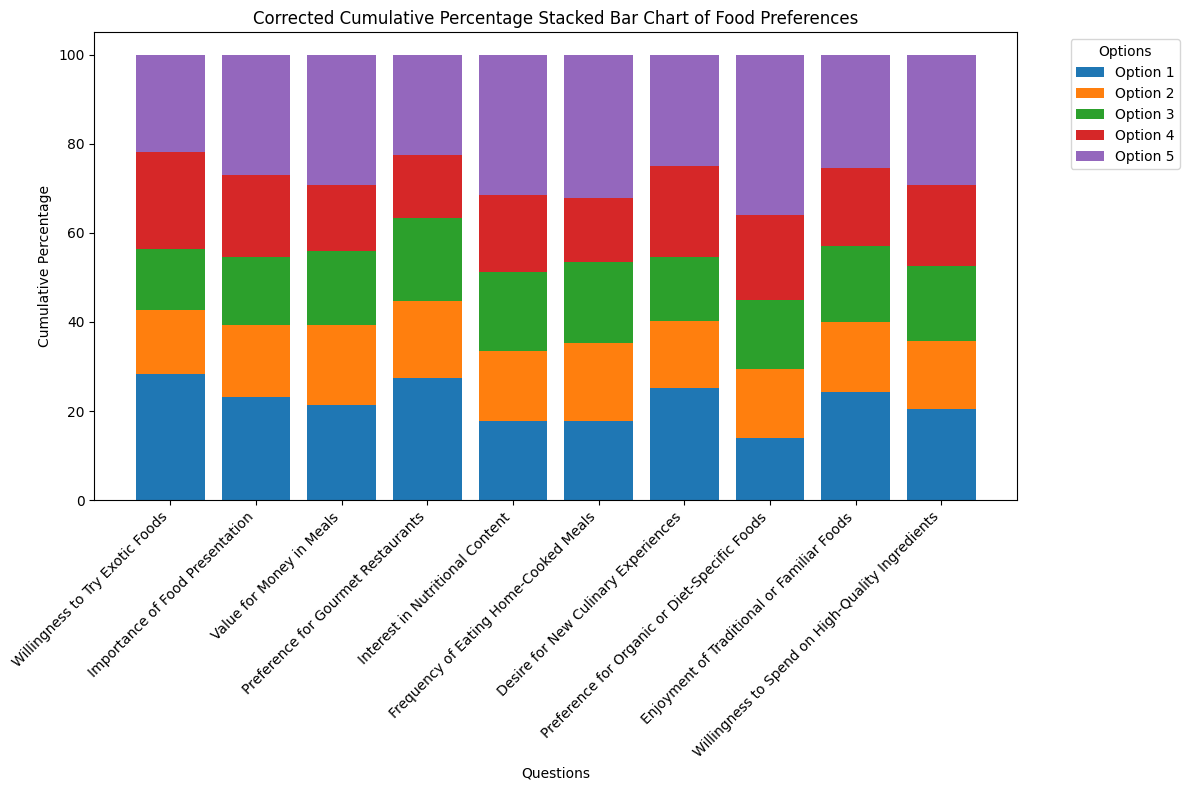

In [41]:

# Calculating the feature percentages for each rating of each feature

# Count frequencies of each rating for each feature
rating_counts = numeric_perturbed_total_answers.apply(pd.Series.value_counts)

# Calculate the total responses for each feature
total_responses = numeric_perturbed_total_answers.count()

# Calculate percentages: (frequency of rating / total responses) * 100
feature_percentages = (rating_counts / total_responses) * 100

# Transpose the DataFrame for better readability
feature_percentages_transposed = feature_percentages.T

# Fill NaN
feature_percentages_transposed = feature_percentages_transposed.fillna(0)


# Plotting the corrected percentage stacked bar chart
plt.figure(figsize=(12, 8))

# Bottom tracker for each bar
bottoms_corrected = pd.Series([0]*len(feature_percentages_transposed), index=feature_percentages_transposed.index)

# Plot each feature
for column in feature_percentages_transposed.columns:
    plt.bar(feature_percentages_transposed.index, feature_percentages_transposed[column], 
            bottom=bottoms_corrected, label=f'Option {column}')
    bottoms_corrected += feature_percentages_transposed[column]

plt.title('Corrected Cumulative Percentage Stacked Bar Chart of Food Preferences')
plt.xlabel('Questions')
plt.ylabel('Cumulative Percentage')
plt.xticks(rotation=45, ha="right")
plt.legend(title='Options', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()

### 4. Build the Predictive Model

In [20]:
# Select all columns except the target
X = perturbed_total_answers.drop(perturbed_total_answers.columns[10], axis=1)

# Select the target
y = perturbed_total_answers.iloc[:, 10]

In [48]:
# Split the dataset into a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Decision Tree Classifier
DecisionTree = DecisionTreeClassifier(max_depth=9)

# Train the classifier with the training set
DecisionTree.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = DecisionTree.predict(X_test)

y_pred_train = DecisionTree.predict(X_train)

# Calculate and print the accuracy
accuracy = accuracy_score(y_train, y_pred_train)
print(f"Training Accuracy: {accuracy}")

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy}")


Training Accuracy: 0.7278210891708872
Test Accuracy: 0.7148167817312798
